## 2. Data Understanding

The data used in this project was obtained from the [Zillow housing data](https://www.zillow.com/research/data/). Our aim is to investigate the data in an attempt to get a deeper understanding of it. 



#### 2.1 Data Description

##### Importing the necessary libaries

In [1]:
# For data manipulation 
import pandas as pd
# For data analysis
import numpy as np
#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Warning libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('ignore')


##### Loading the dataset

In [2]:
data = pd.read_csv("zillow_data.csv")

##### Displaying First Rows

In [3]:
data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


##### Displaying last five rows

In [4]:
data.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


The number of columns(272) in the last and first five rows is the same implying consistency in our dataset

In [5]:
# Checking the shape of dataset
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 14723
Number of columns: 272


The dataset has 14723 rows and 272 columns. 

In [6]:
# Checking for Datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [7]:
# Checking Columns
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [8]:
# Description of the columns
columns = {'Columns': ['RegionID','RegionName','City','State','Metro','County Name','Size Rank','Date Columns (265 Columns)'],
'Description':['Unique region identifier','Names of the Regions (Zipcodes)','City names for the regions',
               'Names of the states','Names of metropolitan areas','Names of counties','Rank of Zipcodes by urbanization',
              'Median house prices across the years']}
pd.DataFrame(columns)

,Columns,Description
0,RegionID,Unique region identifier
1,RegionName,Names of the Regions (Zipcodes)
2,City,City names for the regions
3,State,Names of the states
4,Metro,Names of metropolitan areas
5,County Name,Names of counties
6,Size Rank,Rank of Zipcodes by urbanization
7,Date Columns (265 Columns),Median house prices across the years


In [9]:
# Summary Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RegionID,14723.0,81075.010052,31934.118525,58196.0,67174.5,78007.0,90920.5,753844.0
RegionName,14723.0,48222.348706,29359.325439,1001.0,22101.5,46106.0,75205.5,99901.0
SizeRank,14723.0,7362.000000,4250.308342,1.0,3681.5,7362.0,11042.5,14723.0
1996-04,13684.0,118299.123063,86002.509608,11300.0,68800.0,99500.0,143200.0,3676700.0
1996-05,13684.0,118419.044139,86155.673905,11500.0,68900.0,99500.0,143300.0,3704200.0
...,...,...,...,...,...,...,...,...
2017-12,14723.0,281095.320247,367045.388033,14300.0,129900.0,193400.0,313400.0,18307100.0
2018-01,14723.0,282657.060382,369572.741938,14100.0,130600.0,194100.0,315100.0,18365900.0
2018-02,14723.0,284368.688447,371773.905107,13900.0,131050.0,195000.0,316850.0,18530400.0
2018-03,14723.0,286511.376757,372461.234695,13800.0,131950.0,196700.0,318850.0,18337700.0


#### 2.2 Data Quality from the data description
* The dataset has 14723 rows and 272 columns. 
* The columns have both categorical(4) and numerical data(268)
* There are many columns because it is in a wide fromat; the last 265 columns describe the dates of the housing data. 



## 3. Data Preparation



Inorder to enhance the efficiency of our model, the data has to be inspected and cleaned to align with our objectives. 
This is to ensure that we do not generate any misleading information from the analysis. This includes Checking for the validity, consistency, completeness and uniformity. 

#### 3.1 Data Cleaning

#### 3.1.1 Completeness

*  Checking and Handling for missing values


In [10]:
# Check for missing values 
print(f'The data has {data.isna().sum().sum()} missing values')

The data has 157934 missing values


In [11]:
print(f'The following columns contain these missing values {data.isna().sum().sort_values(ascending = False)}')

The following columns contain these missing values Metro       1043
1997-03     1039
1996-07     1039
1997-06     1039
1997-02     1039
            ... 
2015-11        0
2015-12        0
2016-01        0
2016-02        0
RegionID       0
Length: 272, dtype: int64


In [12]:
per_missing_vals = (data.isna().sum())*100/len(data)
per_missing_vals.sort_values(ascending=False)

Metro       7.084154
1997-03     7.056986
1996-07     7.056986
1997-06     7.056986
1997-02     7.056986
              ...   
2015-11     0.000000
2015-12     0.000000
2016-01     0.000000
2016-02     0.000000
RegionID    0.000000
Length: 272, dtype: float64

In [13]:
# Handling the missing values
## Fill the `metro` column with the word "missing"
data['Metro'].fillna('missing', inplace=True)

In [14]:
missing_values = data.isna().sum().sort_values(ascending=False)
percent = missing_values*100/len(data)
percent.sort_values(ascending=False)
percent

1997-02     7.056986
1997-04     7.056986
1997-05     7.056986
1997-01     7.056986
1996-12     7.056986
              ...   
2015-11     0.000000
2015-12     0.000000
2016-01     0.000000
2016-02     0.000000
RegionID    0.000000
Length: 272, dtype: float64

In [15]:
## Handling the date columns' missing values
data.interpolate(inplace=True)

In [16]:
#Check for the missing values again
data.isna().sum().value_counts()

0    272
dtype: int64

#### 3.1.2 Validity
* Checking for duplicated values 
* Checking for Outliers in the dataset


In [17]:
# Checking for duplicated values  
data.duplicated().sum()


0

There are no duplicated values in the dataset

We  do not check for outliers in the data, as their presence helps improve the accuracy of the model since in real life there are houses that are priced highly above and below the average. 

#### 3.1.3 Uniformity
* Checking if the column names are uniform 
* Exploring the columns more
* Checking if the data types are relevant to the column description


In [18]:
# Cheking the column names again 
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [19]:
# Checking the data type of the RegionName column 
data.dtypes['RegionName']

dtype('int64')

In [20]:
# Renaming the RegionName column to Zipcode because the column's data is in numerical form
data.rename(columns = {'RegionName': "Zipcode"}, inplace=True)

In [21]:
# Changing the data type of the Zipcode column to categorical  
data.Zipcode = data.Zipcode.astype('string')

In [22]:
# Checking for the unique values in the Zipcode column
data.Zipcode.nunique()


14723

#### Data Construction

Here we will  derive new attributes from the data that will be helpful in answering our research questions.

In [23]:

# calculating and creating a new column -ROI

data['22yr_ROI'] = (data['2018-04']/ data['1996-04'])-1
data['5yr_ROI'] = ((data['2018-04'] - data['2013-04'])/ data['2013-04'])


#calculating std to be used to find CV
data["std"] = data.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)
data['5yr_std'] = data.loc[:, "2013-04":"2018-04"].std(skipna=True, axis=1)

#calculating mean to be used to find CV
data["mean"] = data.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)
data["5yr_mean"] = data.loc[:, "2013-04":"2018-04"].mean(skipna=True, axis=1)
# calculating and creating a new column - CV

data["22yr_CV"] = data['std']/data["mean"]
data["5yr_CV"] = data['5yr_std']/data["5yr_mean"]

# dropping std and mean as they are not necessary for analysis

data.drop(["std", "mean", "5yr_std", "5yr_mean"], inplace=True, axis=1)

In [24]:
data.columns

Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
       '22yr_ROI', '5yr_ROI', '22yr_CV', '5yr_CV'],
      dtype='object', length=276)

#### Convert data to Time Series

In [25]:
# Create a copy of the dataset to convert into long view while preserving df as a wide view for EDA
new_data = data.copy()

In [26]:
# creating a function that changes the dataframe structure from wide view to long view

def melt_df(data):
    melted = pd.melt(data, id_vars=['RegionID','Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank','22yr_ROI','22yr_CV','5yr_ROI','5yr_CV' ], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [27]:
# Loading the melted dataset

new_data = melt_df(new_data)


In [28]:
# First five rows of the melted dataset

new_data.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,Date,value
0,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,0.260827,0.066302,1996-04-01,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,0.533842,0.124597,1996-04-01,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,0.283158,0.072385,1996-04-01,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,0.258788,0.056243,1996-04-01,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,0.070485,0.023086,1996-04-01,77300.0


In [29]:
# Bottom five rows of the melted dataset

new_data.tail()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,Date,value
3901590,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,1.212474,0.232707,0.164719,0.058640,2018-04-01,209300.0
3901591,59107,3293,Woodstock,NH,Claremont,Grafton,14720,1.435814,0.303073,0.320468,0.065721,2018-04-01,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,1.336252,0.182705,0.351570,0.085981,2018-04-01,133400.0
3901593,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,2.476714,0.282105,0.250753,0.096821,2018-04-01,664400.0
3901594,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,1.024943,0.310044,0.546990,0.107277,2018-04-01,357200.0


In [46]:
# Number of rows and columns

print('Number of rows:',new_data.shape[0])
print('Number of columns:',new_data.shape[1])

Number of rows: 3901595
Number of columns: 12


In [31]:
# Numerical Columns
print(f"Numerical Columns: {new_data.select_dtypes(include='int').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {new_data.select_dtypes(include='object').columns}")

Numerical Columns: Index([], dtype='object')

Categorical Columns: Index(['City', 'State', 'Metro', 'CountyName'], dtype='object')


In [32]:
# Summary Statistics
new_data.describe()

,RegionID,SizeRank,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,value
count,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06,3.901595e+06
mean,8.107501e+04,7.362000e+03,1.308045e+00,2.373166e-01,3.347280e-01,8.890725e-02,2.060636e+05
std,3.193304e+04,4.250165e+03,1.490562e+00,9.595088e-02,2.658193e-01,5.661946e-02,2.368017e+05
min,5.819600e+04,1.000000e+00,-8.509374e-01,4.127471e-02,-9.484705e-01,4.643504e-03,1.130000e+04
25%,6.717400e+04,3.681000e+03,7.398374e-01,1.682299e-01,1.673081e-01,5.198128e-02,9.770000e+04
50%,7.800700e+04,7.362000e+03,1.113095e+00,2.281251e-01,2.813668e-01,7.864871e-02,1.469000e+05
75%,9.092100e+04,1.104300e+04,1.602582e+00,2.880063e-01,4.543509e-01,1.139259e-01,2.354000e+05
max,7.538440e+05,1.472300e+04,1.019626e+02,1.303920e+00,8.183323e+00,1.432861e+00,1.931490e+07


##### Data Indexing 
While working with time series data in Python, having dates (or datetimes) in the index can be very helpful, especially if they are of DatetimeIndex type.

In [33]:
## Making the date column into the index

new_data.set_index('Date',inplace = True)


In [34]:
# Checking to confirm if the index column of our new dataframe is Date column 
if isinstance(new_data.index, pd.DatetimeIndex):
    new_data.index.name == 'Date'
    print("Index column is date!")
else:
    print('Index column is not Date')

Index column is date!


In [35]:
# Inspecting Index column 
new_data.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='Date', length=3901595, freq=None)

The output above shows that our dataset clearly fulfills the indexing requirements. Look at the last line:

dtype='datetime64[ns]',... length=3901595,...'

dtype=datetime[ns] field confirms that the index is made of timestamp objects.
length=3901595 shows the total number of entries in our time series data.


#### Exploratory Data Analysis

 Exploration will be done on the data to determine:

- Does Urbanization Affect Median House Prices?

- Which cities fetch the highest median house prices?

- What top 5 Zipcodes have the highest ROI?

- Which zipcodes have high price volatility?

##### Univariate Analysis

In [57]:
new_data

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,22yr_ROI,22yr_CV,5yr_ROI,5yr_CV,value
Date,,,,,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,2.083782,0.256487,0.260827,0.066302,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,0.365295,0.152680,0.533842,0.124597,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,0.567966,0.143950,0.283158,0.072385,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,1.623971,0.237364,0.258788,0.056243,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,0.571798,0.178326,0.070485,0.023086,77300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,1.212474,0.232707,0.164719,0.058640,209300.0
2018-04-01,59107,3293,Woodstock,NH,Claremont,Grafton,14720,1.435814,0.303073,0.320468,0.065721,225800.0
2018-04-01,75672,40404,Berea,KY,Richmond,Madison,14721,1.336252,0.182705,0.351570,0.085981,133400.0


In [63]:
new_data.CountyName.nunique()

1212

In [53]:
urban_housevalue = pd.DataFrame(new_data.groupby("SizeRank")["value"].mean()
                                .sort_values(ascending=False).head(5))

In [58]:
urban_housevalue

,value
SizeRank,
273,8.438275e+06
21,5.444482e+06
22,5.085436e+06
509,4.507875e+06
10238,3.487129e+06


Text(0.5, 0, 'SizeRank')

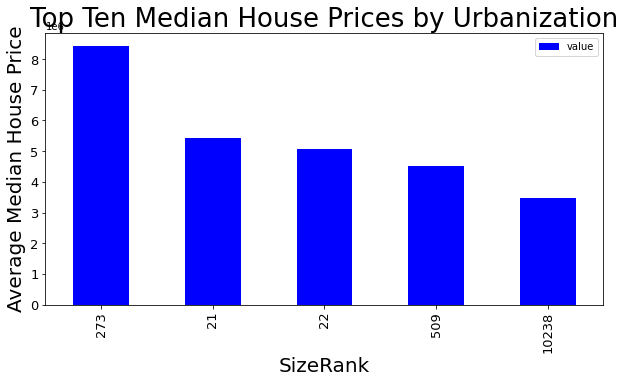

In [54]:
ax1 = urban_housevalue.plot(kind='bar', figsize=(10,5), color="blue", fontsize=13);
ax1.set_alpha(0.8)

ax1.set_title("Top Ten Median House Prices by Urbanization", fontsize=26)
ax1.set_ylabel("Average Median House Price", fontsize=20);
ax1.set_xlabel("SizeRank", fontsize=20)

In [55]:
houseprice_topcities = pd.DataFrame(new_data.groupby("City")["value"].mean()
                                    .sort_values(ascending=False).head(5))

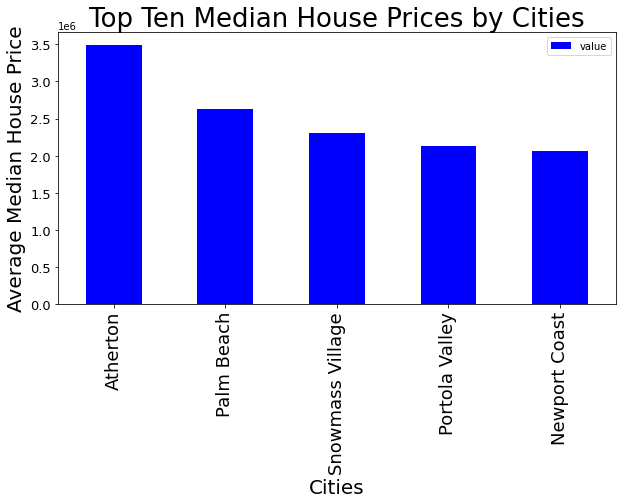

In [56]:
ax2 = houseprice_topcities.plot(kind='bar', figsize=(10,5), color="blue", fontsize=13);
ax2.set_alpha(0.8)

ax2.set_title("Top Ten Median House Prices by Cities", fontsize=26)
ax2.set_ylabel("Average Median House Price", fontsize=20);
ax2.set_xlabel("Cities", fontsize=20)
plt.xticks(fontsize= 18)

plt.show()

#### Time Series EDA

This analysis will answer the question: What is the trend of median houseprices over the years?
 
However, given the large volume of our data, we perform our EDA in two phases: one between 1996 to 2007 and another between 2007 and 2018.

#### Series 1

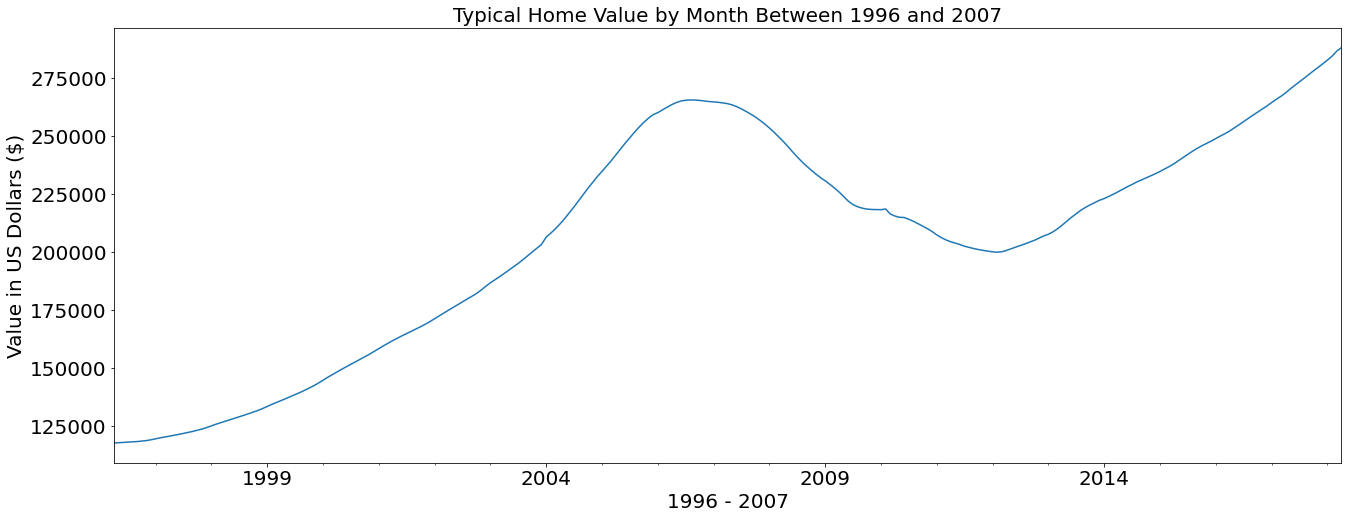

In [64]:
time_series_monthly = new_data.resample('MS').mean()['value']
# Draw a line plot using the new data
time_series_monthly.plot(figsize = (22,8))

plt.title('Typical Home Value by Month Between 1996 and 2007',fontsize = 20)
plt.ylabel('Value in US Dollars ($)',fontsize = 20)
plt.xlabel ('1996 - 2007',fontsize = 20)

plt.yticks(fontsize = 20)
plt.xticks (fontsize = 20)

plt.show()

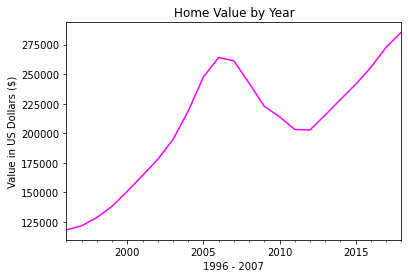

In [65]:
# Annual 
yearly_data =  new_data['value'].resample(rule='A').mean()
yearly_data.plot.line(color='magenta',)

plt.title('Home Value by Year')
plt.ylabel('Value in US Dollars ($)')
plt.xlabel ('1996 - 2007')


plt.show()

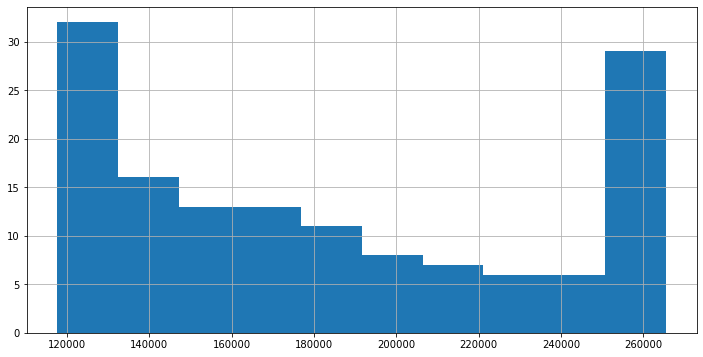

In [39]:
# Plot a histogram of the dataset
time_series1_monthly.hist(figsize = (12,6))
plt.show()

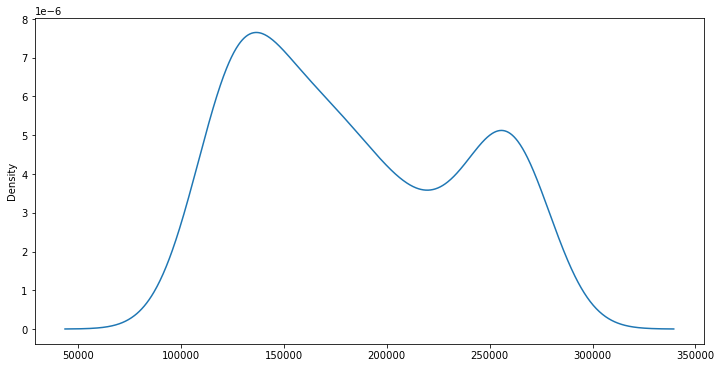

In [40]:
# Plot a density plot for temperature dataset
time_series1_monthly.plot(kind='kde', figsize = (12,6))
plt.show()

#### Heatmap for Time Series

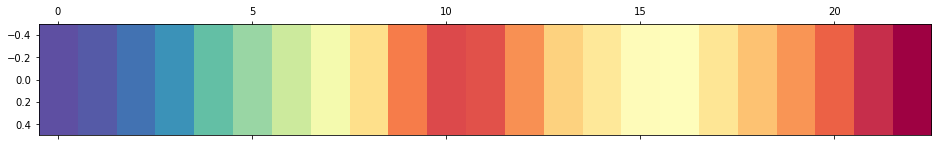

In [45]:
# Transpose the yearly group DataFrame
year_matrix = new_data['value'].resample(rule='A').mean().to_frame().T

# Draw a heatmap with matshow()
plt.matshow( year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()